# Importing all desired libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

# Reading the dataset

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
datasets=os.listdir("C:\\Users\\kavin\\OneDrive\\Desktop\\datatata")
data=[]
c=input()
c=c.upper()
c=list(c)
for i in range(len(c)):
    if c[i]==' ':
        c[i]='_'
c=''.join(c)
d=c+"__EQ__INDICES__NSE__MINUTE.csv"
c=c+"__EQ__NSE__NSE__MINUTE.csv"
found=0
for i in datasets:
    if i==c:
        found=1
        break
    elif i==d:
        found=1
        c=d
        break
        
if found:
    path="C:\\Users\\kavin\\OneDrive\\Desktop\\datatata\\"+c
    dataset=pd.read_csv(path)
    dataset=pd.DataFrame(dataset)
    dataset['timestamp']=dataset['timestamp'].astype('string')
    dataset[['Date','Time']] = dataset.timestamp.str.split(" ",expand=True,)
    if len(dataset)<200:
        print("Insufficient Data")
    else:
        dataset=dataset.dropna(how="any",subset=['open','high','volume','close'])
        dataset=dataset.drop_duplicates(keep='last')
        dataset['Date']=pd.to_datetime(dataset['Date'])
        dataset['Time']=dataset['Time'].apply(lambda i:i[:2])
#         reqdata=dataset.groupby(['Date','Time'])['open'].apply(list)
# for i in range(20):
#     data.append(reqdata[i])
# plt.boxplot(data)
# plt.show()
dataset

Reliance


,timestamp,open,high,low,close,volume,Date,Time
0,2017-01-02 09:15:00+05:30,541.63,542.95,540.70,541.00,30698.0,2017-01-02,09
1,2017-01-02 09:16:00+05:30,541.45,541.75,541.13,541.50,14934.0,2017-01-02,09
2,2017-01-02 09:17:00+05:30,541.63,541.63,537.23,537.23,52936.0,2017-01-02,09
3,2017-01-02 09:18:00+05:30,537.33,539.93,536.20,539.93,34696.0,2017-01-02,09
4,2017-01-02 09:19:00+05:30,539.95,540.18,539.40,539.85,20904.0,2017-01-02,09
...,...,...,...,...,...,...,...,...
310481,2020-05-15 15:25:00+05:30,1457.75,1457.75,1455.45,1455.90,68875.0,2020-05-15,15
310482,2020-05-15 15:26:00+05:30,1455.45,1455.50,1452.50,1452.50,88366.0,2020-05-15,15
310483,2020-05-15 15:27:00+05:30,1452.80,1454.40,1452.00,1453.70,94147.0,2020-05-15,15
310484,2020-05-15 15:28:00+05:30,1453.70,1453.80,1452.00,1453.00,66064.0,2020-05-15,15


### Finding categorical data from dataset

In [2]:
#To findout categorical data only from the dataset
catdata=dataset.select_dtypes(include=['object']).copy()
catdata.head()

,Time
0,09
1,09
2,09
3,09
4,09


As there is only one value that is of object type and this columns does contain very large number of values therefore it is not a categorical data.

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310348 entries, 0 to 310485
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   timestamp  310348 non-null  string        
 1   open       310348 non-null  float64       
 2   high       310348 non-null  float64       
 3   low        310348 non-null  float64       
 4   close      310348 non-null  float64       
 5   volume     310348 non-null  float64       
 6   Date       310348 non-null  datetime64[ns]
 7   Time       310348 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(1), string(1)
memory usage: 21.3+ MB


In [8]:
#Checking for null values
print(catdata.isnull().values.sum())

0


There is no null value in dataset

# Univariate and Bivariate analysis

## Univariate distribution

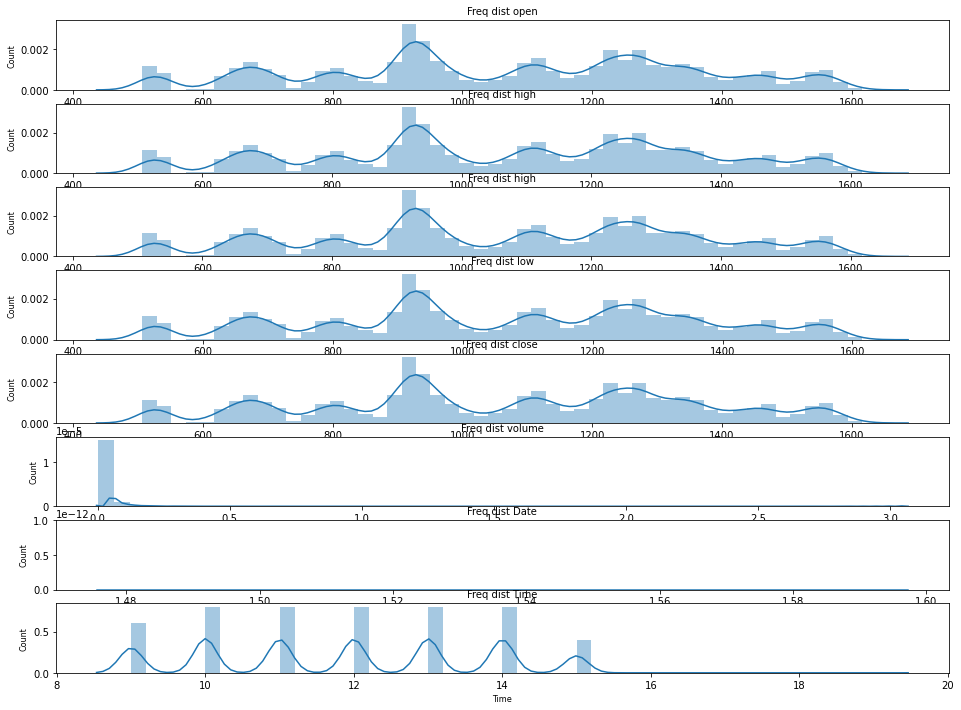

In [16]:
#Univariate distribution
col_names= ['open','high','high','low','close','volume','Date','Time']

fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):

    sns.distplot(dataset[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
plt.show()

## Bivariate distribution

<Figure size 1008x1008 with 0 Axes>

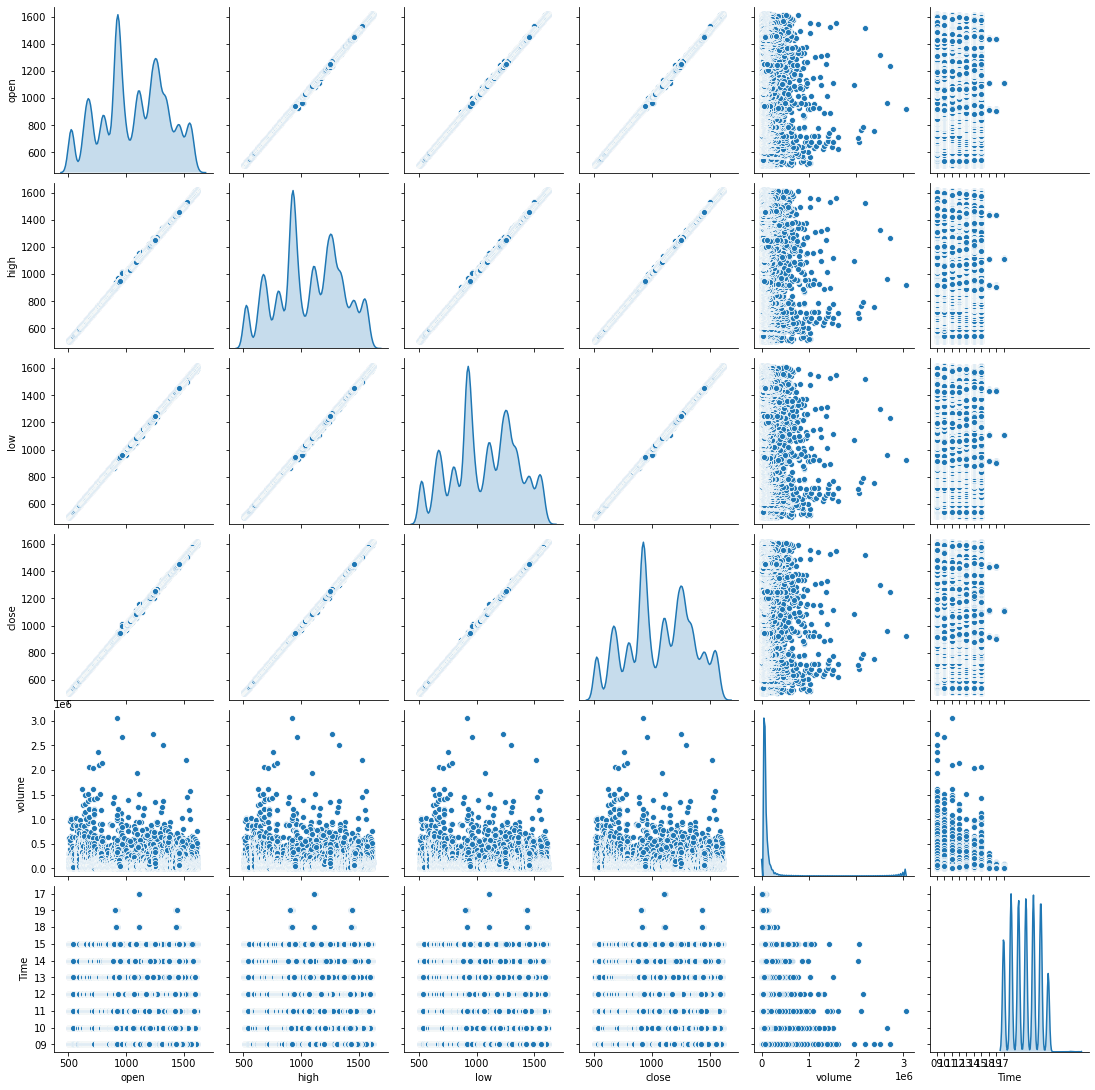

In [19]:
#Bivariate distribution
plt.figure(figsize=(14, 14))
sns.pairplot(dataset, diag_kind='kde');
plt.show()

# Identifying and treating missing values

In [28]:
dataset.isnull().values.any()

False

In [29]:
dataset.isnull().sum()

timestamp    0
open         0
high         0
low          0
close        0
volume       0
Date         0
Time         0
dtype: int64

There are no missing values in dataset

# CorrelationMatrix

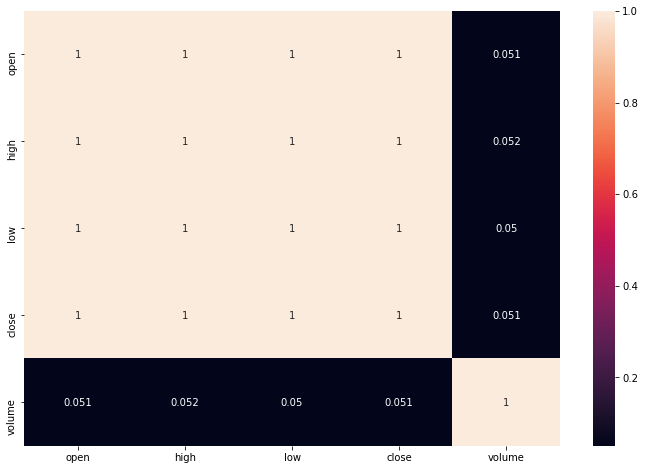

In [23]:
#CorelationMatrix
plt.figure(figsize=(12, 8))
datacorr = dataset.corr()
sns.heatmap(datacorr, xticklabels = datacorr.columns.values,yticklabels = datacorr.columns.values,annot = True)
plt.show()